In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Yeast\Yeast_NN_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.58,0.61,0.47,0.13,0.5,0.0,NaN,0.22
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,NaN
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22
3,0.58,0.44,0.57,0.13,0.5,NaN,0.54,0.22
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22
...,...,...,...,...,...,...,...,...
1479,0.82,0.63,0.47,0.18,0.5,0.0,0.50,0.22
1480,0.35,0.29,0.46,0.14,0.5,0.0,0.54,0.66
1481,0.41,0.47,0.50,0.14,0.5,0.0,0.53,0.37
1482,0.51,0.45,0.62,0.25,0.5,NaN,0.59,0.22


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	74
float64		column 2	74
float64		column 3	111
float64		column 4	37
float64		column 5	37
float64		column 6	111
float64		column 7	74
float64		column 8	74


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
count,1410.000000,1410.000000,1373.000000,1447.000000,1447.000000,1373.000000,1410.000000,1410.000000
mean,0.499291,0.499986,0.501908,0.260276,0.504492,0.007502,0.500284,0.275837
std,0.135547,0.122949,0.084754,0.135908,0.047195,0.075456,0.056872,0.104326
min,0.170000,0.130000,0.210000,0.000000,0.500000,0.000000,0.000000,0.000000
25%,0.410000,0.420000,0.460000,0.170000,0.500000,0.000000,0.480000,0.220000
50%,0.480000,0.490000,0.510000,0.220000,0.500000,0.000000,0.510000,0.220000
75%,0.570000,0.570000,0.550000,0.320000,0.500000,0.000000,0.530000,0.300000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.830000,0.730000,0.990000


<AxesSubplot:>

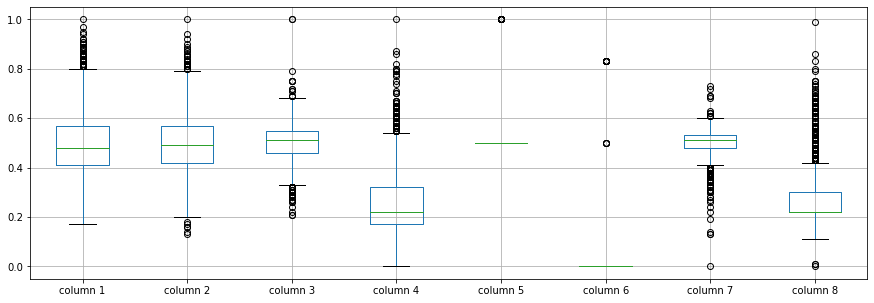

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    0.499291
column 2    0.499986
column 3    0.501908
column 4    0.260276
column 5    0.504492
column 6    0.007502
column 7    0.500284
column 8    0.275837
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
column 1,1.000000,0.578566,-0.170954,0.162568,0.057771,-0.009501,0.058073,-0.131137
column 2,0.578566,1.000000,-0.264669,0.133400,0.057687,0.030097,0.105495,-0.100170
column 3,-0.170954,-0.264669,1.000000,0.044312,-0.000642,0.009555,-0.208251,-0.015415
column 4,0.162568,0.133400,0.044312,1.000000,0.003175,-0.012889,-0.111163,-0.038594
column 5,0.057771,0.057687,-0.000642,0.003175,1.000000,-0.009188,0.035499,0.002760
column 6,-0.009501,0.030097,0.009555,-0.012889,-0.009188,1.000000,0.018350,-0.034979
column 7,0.058073,0.105495,-0.208251,-0.111163,0.035499,0.018350,1.000000,0.079866
column 8,-0.131137,-0.100170,-0.015415,-0.038594,0.002760,-0.034979,0.079866,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [8,8+21,8+21+21,8+21+21+21,8+21+21+21+21,8+21+21+21+21+21,8+21+21+21+21+21+21,8+21+21+21+21+21,8+21+21+21+21,8+21+21+21,8+21+21,8+21,8], vae_layer = False, seed = 8)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [8]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 2.873326283434163
Epoch: 1 , loss: 2.4800302464029063
Epoch: 2 , loss: 2.2695165082164435
Epoch: 3 , loss: 2.1201319189175316
Epoch: 4 , loss: 1.965163229600243
Epoch: 5 , loss: 1.8837576534437097
Epoch: 6 , loss: 1.7978397983571757
Epoch: 7 , loss: 1.720475691816081
Epoch: 8 , loss: 1.6138039166512697
Epoch: 9 , loss: 1.5676355595174043
Epoch: 10 , loss: 1.5072532840397046
Epoch: 11 , loss: 1.4557396614033242
Epoch: 12 , loss: 1.4170835011679193
Epoch: 13 , loss: 1.380833133407261
Epoch: 14 , loss: 1.3543969574181929
Epoch: 15 , loss: 1.322054740527402
Epoch: 16 , loss: 1.2871636670568716
Epoch: 17 , loss: 1.2903888607802598
Epoch: 18 , loss: 1.2517794539099154
Epoch: 19 , loss: 1.2301177686971168
Epoch: 20 , loss: 1.221869301536809
Epoch: 21 , loss: 1.1892618076956791
Epoch: 22 , loss: 1.202833371317905
Epoch: 23 , loss: 1.171140427822652
Epoch: 24 , loss: 1.1633383301289186
Epoch: 25 , loss: 1.137534

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(1484, 8)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    0.43
column 2    0.44
column 3    0.48
column 4    0.22
column 5    0.50
column 6    0.00
column 7    0.51
column 8    0.22
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Yeast.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.0,0.0,0.0,0.0,0.0,0.000000,-0.02166,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.058293
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.001234,0.00000,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000
...,...,...,...,...,...,...,...,...
1479,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000
1480,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000
1481,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000
1482,0.0,0.0,0.0,0.0,0.0,0.000796,0.00000,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(4.0187806118226375, 46.90414374018569)

In [17]:
NRMS=numerator/denominator
NRMS


0.08568071584642316

In [18]:
new_df.iloc[66,:]

column 1    0.460000
column 2    0.490000
column 3    0.580000
column 4    0.230000
column 5    0.500000
column 6    0.000000
column 7    0.589751
column 8    0.220000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.58,0.61,0.47,0.13,0.5,0.000000,0.45834,0.220000
1,0.43,0.67,0.48,0.27,0.5,0.000000,0.53000,0.278293
2,0.64,0.62,0.49,0.15,0.5,0.000000,0.53000,0.220000
3,0.58,0.44,0.57,0.13,0.5,0.001234,0.54000,0.220000
4,0.42,0.44,0.48,0.54,0.5,0.000000,0.48000,0.220000
...,...,...,...,...,...,...,...,...
1479,0.82,0.63,0.47,0.18,0.5,0.000000,0.50000,0.220000
1480,0.35,0.29,0.46,0.14,0.5,0.000000,0.54000,0.660000
1481,0.41,0.47,0.50,0.14,0.5,0.000000,0.53000,0.370000
1482,0.51,0.45,0.62,0.25,0.5,0.000796,0.59000,0.220000


In [20]:
imputations[-1].to_excel("Yeast_NN_5(imp).xlsx", index=False, header=False)